# Trabalho Prático 1 - Problemas das Barracas
    Resumo: "Em um evento, os homens e as mulheres estão em um campo (representado por um plano cartesiano comum), e devem se estabelecer em barracas quadradas, todas paralelas. O trabalho é receber um monte de entradas com o número de barracas masculinas e femininas, depois as coordenadas do ponto inferior esquerdo e superior direito de cada barraca, e informar se é possível separar as barracas por um linha de espessura infima."
    
    Entradas:
    OBS: "A entrada pode ser lida de qualquer arquivo ou através da entrada padrão (teclado)."
    3 3   <-- número de barracas masculinas e femininas
    10 10 20 20
    30 30 40 40  <-- coordenadas dos pontos para determinar a barraca
    50 50 60 60
    30 10 40 20
    50 30 60 40
    70 50 80 60
    0 0   <-- final da execução
    
    Saídas:
    OBS: "A saída não deve ser escrita em nenhum arquivo. Ela deve ser escrita na saída padrão."
    "É possível separar os dois grupos!", se for possível separá-los. Caso contrário, imprima: “Não é possível separar os dois grupos!".

Estratégia: usar perímetros entre duplas de barracas e verificar suas colisões com outras duplas ou barracas.

- Usar biblioteca "polygons", possui objetos para polígonos e verificação de colisão.

4 casos possíveis, de acordo com o número de barracas:

    -> se A,B = 0: encerra o programa
    -> se A,B = 1: possível direto
    -> se A>=1 e B=0: possível direto
    -> se A>1 e B=1: B fixo, verifica todas as duplas possíveis com A
    -> se A,B>1: verifica todas as duplas possiveis com A com todas as duplas possíveis com B

Caso 1: É possível separar.


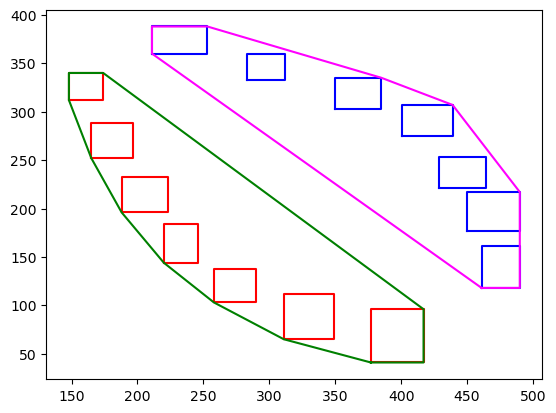

Caso 2: É possível separar.


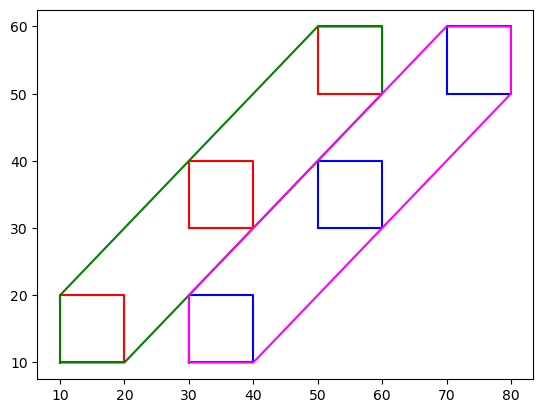

Caso 3: É possível separar.


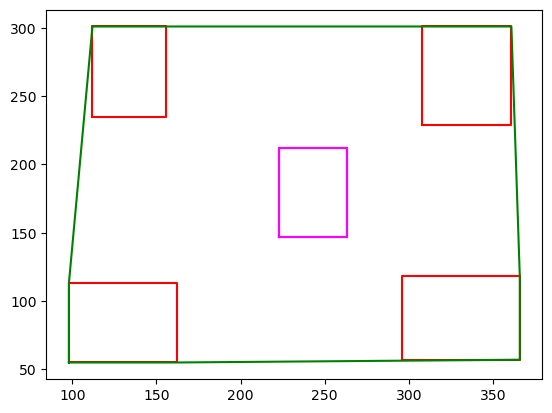

Caso 4: Não é possível separar.


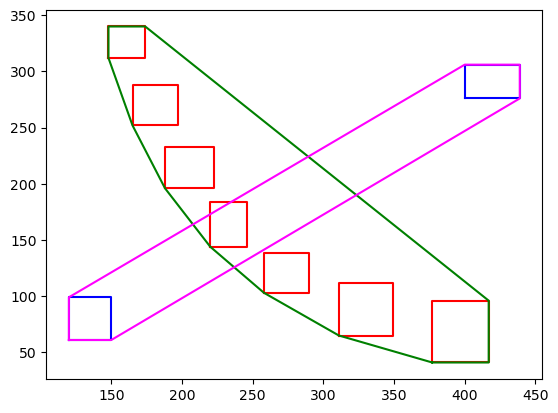

Caso 5: É possível separar.


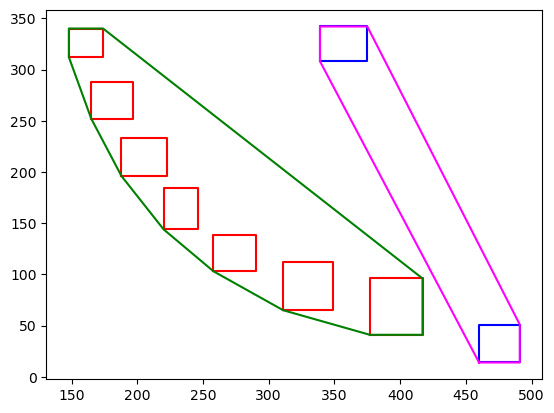

Caso 6: Não é possível separar.


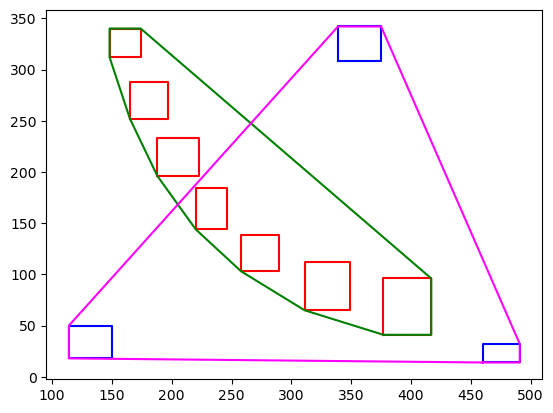

Caso 7: Não é possível separar.


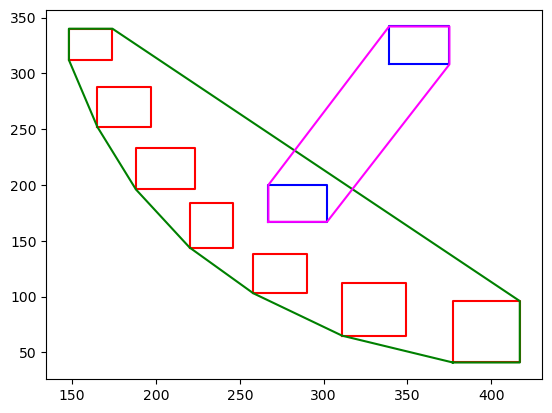

Caso 8: É possível separar.


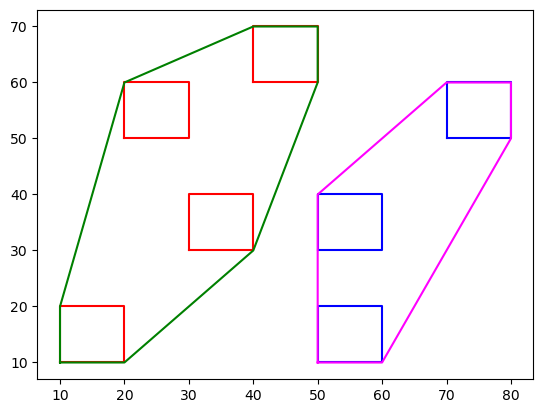

In [83]:
from shapely.geometry import Polygon, MultiLineString
import matplotlib.pyplot as plt

with open("input.txt") as arq:
    strIni = arq.readline()
    nCaso = 1

    while ((strIni != "0 0") and (strIni != "")):
        numsIni = strIni.split(" ")
        numsIni = [int(numsIni[0]),int(numsIni[1])]
        
        fig, ax = plt.subplots()
        
        grpA = []
        grpB = []

        # Recebe as entradas do 1o grupo
        for i in range(numsIni[0]):
            strNovo = arq.readline()
            numsNovo = strNovo.split(" ")
            numsNovo = [int(numsNovo[0]),int(numsNovo[1]), int(numsNovo[2]),int(numsNovo[3])]
            p1,p2,p3,p4 = [(numsNovo[0],numsNovo[1]), (numsNovo[0],numsNovo[3]), (numsNovo[2],numsNovo[3]), (numsNovo[2],numsNovo[1])]
            novaBarraca = Polygon([p1,p2,p3,p4])
            grpA.append(novaBarraca)
        # Recebe as entradas do 2o grupo
        for i in range(numsIni[1]):
            strNovo = arq.readline()
            numsNovo = strNovo.split(" ")
            numsNovo = [int(numsNovo[0]),int(numsNovo[1]), int(numsNovo[2]),int(numsNovo[3])]
            p1,p2,p3,p4 = [(numsNovo[0],numsNovo[1]), (numsNovo[0],numsNovo[3]), (numsNovo[2],numsNovo[3]), (numsNovo[2],numsNovo[1])]
            novaBarraca = Polygon([p1,p2,p3,p4])
            grpB.append(novaBarraca)

        # Casos em que passa direto
        if (numsIni[0] == 0 or numsIni[1] == 0) or (numsIni[0] == 1 and numsIni[1] == 1):
            print(f"Caso {nCaso}: É possível separar os dois grupos!")

        # Casos que precisam de analise
        else: 
            # Plot as barracas de A
            vertsA = []
            for poly in grpA:
                x,y = poly.exterior.xy
                ax.plot(x,y,color = 'red')

            # Forma a área maior de A
            if len(grpA) == 1: areaA = grpA[0]
            else:
                for poly in grpA:
                    vertsA += poly.exterior.coords
                areaA = Polygon(vertsA)
                
            areaA = areaA.convex_hull
            x,y = areaA.exterior.xy
            ax.plot(x,y,color='green')
            
                
            #Plot as barracas de B
            vertsB = []
            for poly in grpB:
                x,y = poly.exterior.xy
                ax.plot(x,y, color="blue")                
                
            # Forma a área maior de B
            if len(grpB) == 1:  areaB = grpB[0]
            else:
                for poly in grpB:
                    vertsB += poly.exterior.coords
                areaB = Polygon(vertsB)
                
            areaB = areaB.convex_hull
            x,y = areaB.exterior.xy
            ax.plot(x,y,color='magenta')
            
            
            # Verifica se houve intersecção das áreas
            if areaA.covers(areaB) or areaA.overlaps(areaB): print(f"Caso {nCaso}: Não é possível separar.")
            else: print(f"Caso {nCaso}: É possível separar.")
            
            plt.show()
            
        strIni = arq.readline()                 
        nCaso = nCaso + 1
        